In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [2]:
continuous_features = ['duration', 'days_left', 'price']
categorical_features = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

In [3]:
df = pd.read_csv('Clean_Dataset.csv')
business = pd.read_csv('business.csv')
economy = pd.read_csv('economy.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
df.corr().T

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [9]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

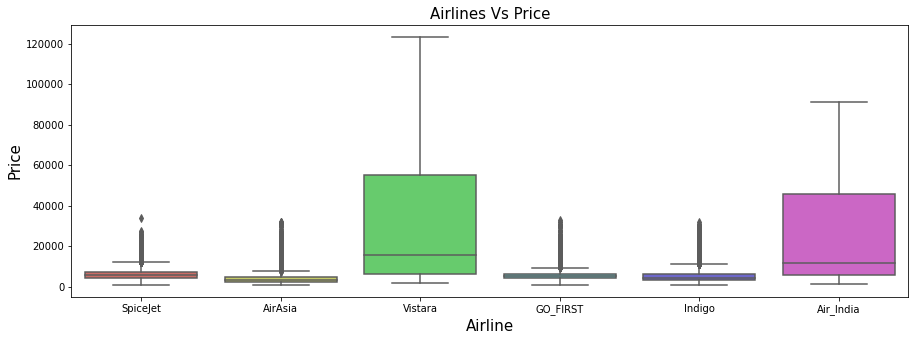

In [10]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

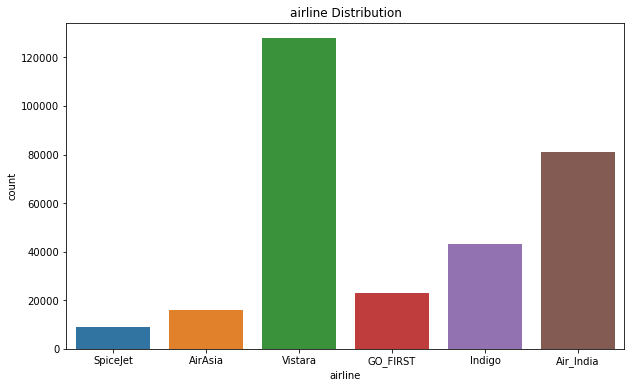

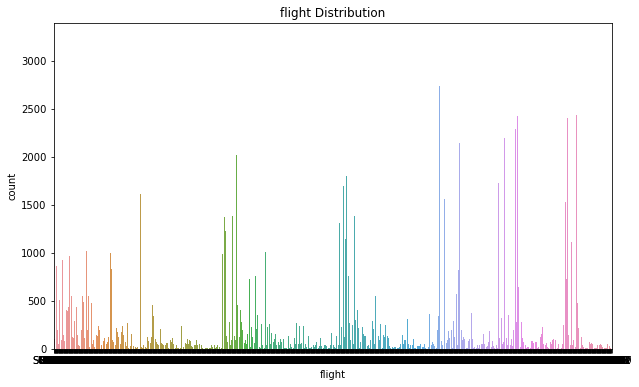

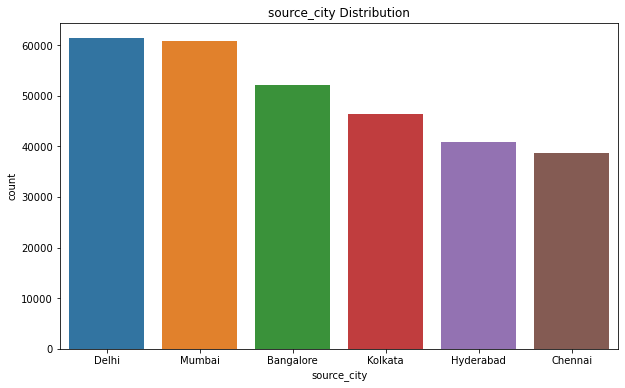

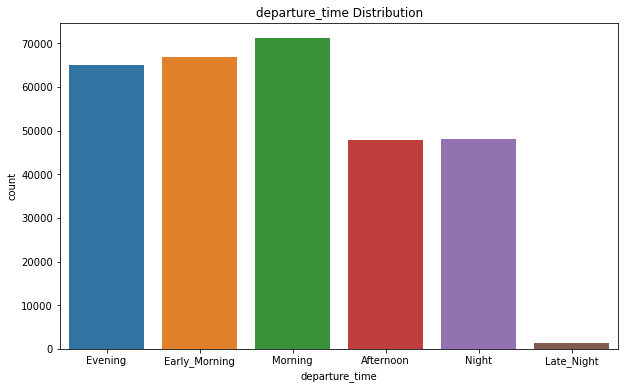

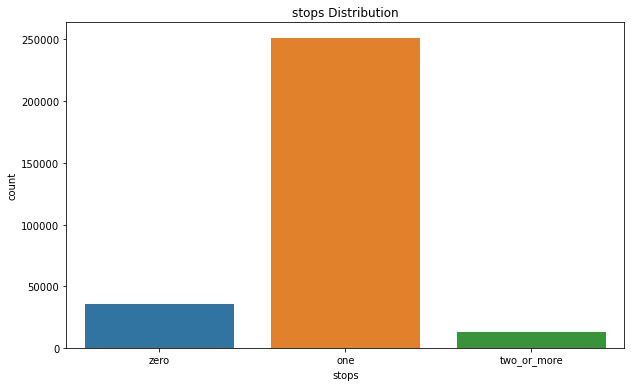

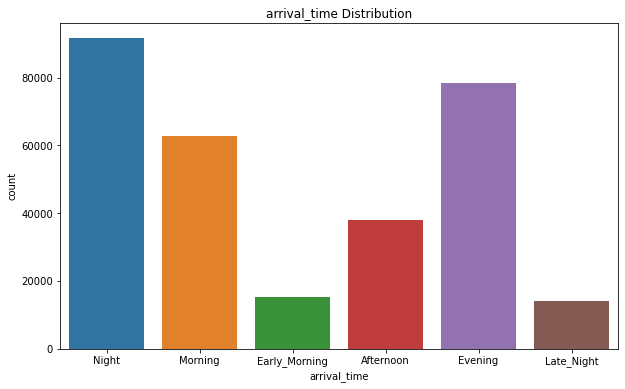

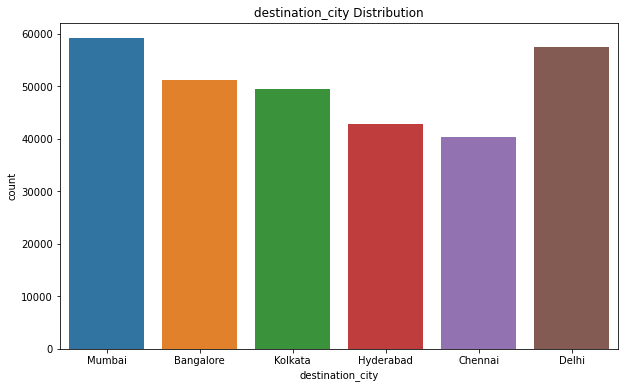

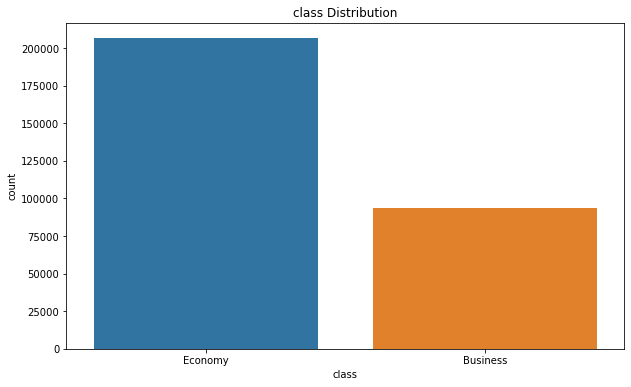

In [11]:
# Distribution for categorical variables
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f"{feature} Distribution")
    plt.show()


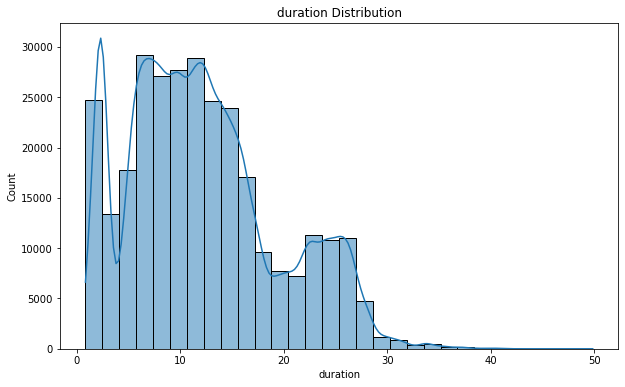

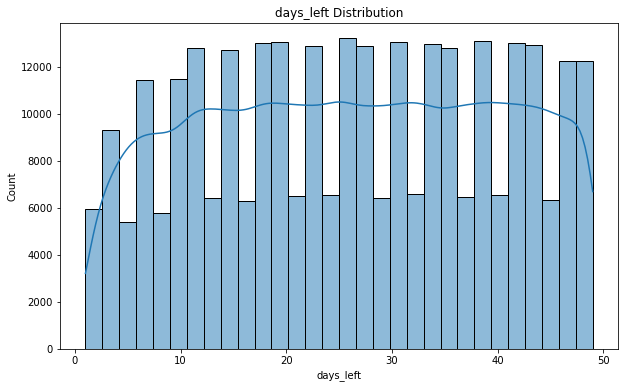

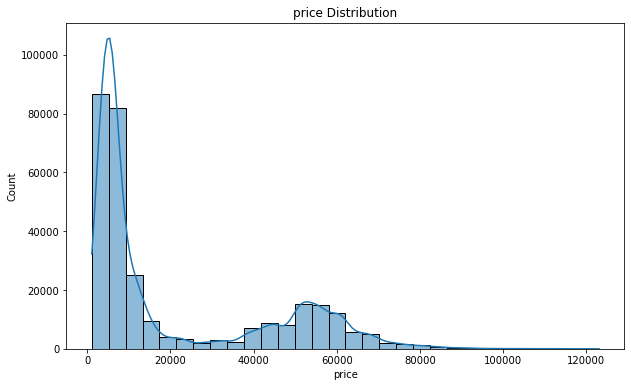

In [12]:
# Distribution for continuous variables
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"{feature} Distribution")
    plt.show()

# Transform continuous features into categorical features


In [13]:
# Discretize continuous features into bins
df['duration_bin'] = pd.cut(df['duration'], bins=3, labels=['short', 'medium', 'long'])
df['days_left_bin'] = pd.cut(df['days_left'], bins=3, labels=['few', 'moderate', 'many'])
df['price_bin'] = pd.cut(df['price'], bins=3, labels=['low', 'medium', 'high'])

all_features_categorized = categorical_features + ['duration_bin', 'days_left_bin', 'price_bin']


Make sure all values are boolean

In [14]:
# One-hot encode categorical features
encoded_data = pd.get_dummies(df[all_features_categorized].drop(["flight","airline"],axis= 1))

# Ensure all values in the DataFrame are boolean
encoded_data = encoded_data.astype(bool)

print(encoded_data.head())

   source_city_Bangalore  source_city_Chennai  source_city_Delhi  \
0                  False                False               True   
1                  False                False               True   
2                  False                False               True   
3                  False                False               True   
4                  False                False               True   

   source_city_Hyderabad  source_city_Kolkata  source_city_Mumbai  \
0                  False                False               False   
1                  False                False               False   
2                  False                False               False   
3                  False                False               False   
4                  False                False               False   

   departure_time_Afternoon  departure_time_Early_Morning  \
0                     False                         False   
1                     False                          T

Create apriori and fp-growth rules

In [15]:
from mlxtend.frequent_patterns import apriori, fpgrowth,association_rules
import time

# Measure time for Apriori
start_time = time.time()

# Apply Apriori algorithm
frequent_itemsets_apriori =apriori(pd.get_dummies(df[all_features_categorized].drop(["flight"],axis= 1)), min_support=0.1, use_colnames=True)

# Generate association rules
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1)


end_time = time.time()
apriori_duration = end_time - start_time


print(f"Apriori - Time taken: {apriori_duration:.4f} seconds")
print(f"Apriori - Number of frequent itemsets: {len(frequent_itemsets_apriori)}")
print(f"Apriori - Number of rules generated: {len(rules_apriori)}")

# Measure time for FP-Growth
start_time = time.time()

# Run FP-Growth algorithm to find frequent itemsets
frequent_itemsets_fpgrowth = fpgrowth(pd.get_dummies(df[all_features_categorized].drop(["flight"],axis= 1)), min_support=0.1, use_colnames=True)

# Generate association rules
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1.0)

end_time = time.time()
fpgrowth_duration = end_time - start_time

print(f"FP-Growth - Time taken: {fpgrowth_duration:.4f} seconds")
print(f"FP-Growth - Number of frequent itemsets: {len(frequent_itemsets_fpgrowth)}")
print(f"FP-Growth - Number of rules generated: {len(rules_fpgrowth)}")


/Users/ezgi/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori - Time taken: 2.0477 seconds
Apriori - Number of frequent itemsets: 364
Apriori - Number of rules generated: 1326


/Users/ezgi/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


FP-Growth - Time taken: 2.3740 seconds
FP-Growth - Number of frequent itemsets: 364
FP-Growth - Number of rules generated: 1326


Select rules

In [17]:
# Select airline related rules
airline_related_rules = rules_apriori[rules_apriori['consequents'].apply(lambda x: 'airline' in str(x))]
multi_feature_antecedents = airline_related_rules[airline_related_rules['antecedents'].apply(lambda x: len(x) > 1)]

print(multi_feature_antecedents,len(multi_feature_antecedents))
# Select rules with high confidence
selected_rules = multi_feature_antecedents[(multi_feature_antecedents['confidence'] > 0.5)]

# Display selected rules
print(selected_rules,len(selected_rules))


                                         antecedents  \
143                       (class_Economy, stops_one)   
147                  (duration_bin_short, stops_one)   
151                       (price_bin_low, stops_one)   
154              (class_Economy, duration_bin_short)   
161                   (class_Economy, price_bin_low)   
...                                              ...   
1154  (class_Economy, duration_bin_short, stops_one)   
1158             (duration_bin_short, price_bin_low)   
1159             (class_Economy, duration_bin_short)   
1160                      (price_bin_low, stops_one)   
1162                      (class_Economy, stops_one)   

                                            consequents  antecedent support  \
143                                    (airline_Indigo)            0.554920   
147                                    (airline_Indigo)            0.628936   
151                                    (airline_Indigo)            0.586687   
154        

Create apriori features

In [20]:
data_extended = df.copy()
#Create binary features based on selected patterns
for index, row in selected_rules.iterrows():
    antecedents = list(row['antecedents'])
    feature_name = '_'.join(antecedents)
    data_extended[feature_name] = encoded_data[antecedents].all(axis=1).astype(int)

# Display the new features
multi_features_apriori = data_extended.drop(all_features_categorized,axis=1)
multi_features_apriori = multi_features_apriori.drop(continuous_features,axis=1)
multi_features_apriori.head(5).shape

(5, 11)

# Train Random Forest Model 

With only categorical values

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

features = pd.get_dummies(df[categorical_features].drop(['airline',"flight"],axis=1))
labels = df['airline']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6162982459062818
              precision    recall  f1-score   support

     AirAsia       0.60      0.37      0.46      3250
   Air_India       0.66      0.44      0.53     16334
    GO_FIRST       0.48      0.36      0.41      4617
      Indigo       0.56      0.64      0.60      8652
    SpiceJet       0.48      0.26      0.34      1771
     Vistara       0.64      0.83      0.72     25407

    accuracy                           0.62     60031
   macro avg       0.57      0.48      0.51     60031
weighted avg       0.61      0.62      0.60     60031



with both categorical and continuous features

In [24]:

data = df.copy()

X_categorical = pd.get_dummies(df[categorical_features].drop(['airline',"flight"],axis=1))

features = pd.concat([X_categorical, data[continuous_features]], axis=1) 
labels = df['airline']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9705985240958838
              precision    recall  f1-score   support

     AirAsia       0.97      0.95      0.96      3250
   Air_India       0.97      0.97      0.97     16334
    GO_FIRST       0.96      0.95      0.95      4617
      Indigo       0.96      0.96      0.96      8652
    SpiceJet       0.96      0.95      0.96      1771
     Vistara       0.97      0.98      0.98     25407

    accuracy                           0.97     60031
   macro avg       0.97      0.96      0.96     60031
weighted avg       0.97      0.97      0.97     60031



# Cross Validation


with only categorical values

In [25]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

X_categorical = pd.get_dummies(df[categorical_features].drop(['airline',"flight"],axis=1))
features = X_categorical
labels = df['airline']

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, features, labels, cv=cv, scoring='accuracy')

# Print the cross-validation results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")
print(f"Standard deviation of cross-validation accuracy: {cv_scores.std()}")


Cross-validation accuracy scores: [0.54027086 0.5407706  0.54430211 0.54377811 0.54284524]
Mean cross-validation accuracy: 0.542393385495344
Standard deviation of cross-validation accuracy: 0.0016064503189180924


with both categorical and continuous features

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load your data
data = df.copy()


# One-hot encode categorical features
X_categorical = pd.get_dummies(df[categorical_features].drop(['airline',"flight"],axis=1))

# Combine categorical and continuous features
X = pd.concat([X_categorical,data[continuous_features]], axis=1)
y = data['airline']

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")
print(f"Standard deviation of cross-validation accuracy: {cv_scores.std()}")


Cross-validation accuracy scores: [0.96876614 0.96869951 0.96959904 0.96841579 0.9687323 ]
Mean cross-validation accuracy: 0.9688425551734691
Standard deviation of cross-validation accuracy: 0.00039820994216913964


# Train Random Forest with Pattern Mining


X_categorical , continuous_features

In [27]:

X_categorical = pd.get_dummies(df[all_features_categorized].drop(['airline',"flight"],axis=1))

features = pd.concat([X_categorical,data[continuous_features]], axis=1) 
labels = df['airline']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9620362812546851
              precision    recall  f1-score   support

     AirAsia       0.96      0.93      0.95      3250
   Air_India       0.97      0.95      0.96     16334
    GO_FIRST       0.95      0.94      0.94      4617
      Indigo       0.95      0.95      0.95      8652
    SpiceJet       0.95      0.95      0.95      1771
     Vistara       0.97      0.98      0.97     25407

    accuracy                           0.96     60031
   macro avg       0.96      0.95      0.95     60031
weighted avg       0.96      0.96      0.96     60031



multi_features_apriori , continuous_features

In [28]:
data = df.copy()

X_categorical = pd.get_dummies(data[all_features_categorized].drop(['airline',"flight"],axis=1))
features = pd.concat([data[continuous_features],multi_features_apriori], axis=1) 
labels = df['airline']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.833635954756709
              precision    recall  f1-score   support

     AirAsia       0.84      0.74      0.79      3250
   Air_India       0.85      0.81      0.83     16334
    GO_FIRST       0.76      0.74      0.75      4617
      Indigo       0.78      0.80      0.79      8652
    SpiceJet       0.74      0.68      0.71      1771
     Vistara       0.86      0.90      0.88     25407

    accuracy                           0.83     60031
   macro avg       0.81      0.78      0.79     60031
weighted avg       0.83      0.83      0.83     60031



X_categorical , multi_features_apriori

In [30]:

data = df.copy()

X_categorical = pd.get_dummies(df[all_features_categorized].drop(['airline',"flight"],axis=1))

features = pd.concat([multi_features_apriori, X_categorical], axis=1) 
labels = df['airline']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5840815578617714
              precision    recall  f1-score   support

     AirAsia       0.34      0.72      0.46      3250
   Air_India       0.71      0.52      0.60     16334
    GO_FIRST       0.34      0.62      0.44      4617
      Indigo       0.60      0.61      0.60      8652
    SpiceJet       0.25      0.84      0.39      1771
     Vistara       0.81      0.58      0.68     25407

    accuracy                           0.58     60031
   macro avg       0.51      0.65      0.53     60031
weighted avg       0.67      0.58      0.61     60031



multi_features_apriori

In [32]:
data = df.copy()

features = multi_features_apriori
labels = df['airline']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.2737085838983192
              precision    recall  f1-score   support

     AirAsia       0.09      0.87      0.16      3250
   Air_India       0.47      0.18      0.26     16334
    GO_FIRST       0.00      0.00      0.00      4617
      Indigo       0.21      0.21      0.21      8652
    SpiceJet       0.00      0.00      0.00      1771
     Vistara       0.71      0.35      0.47     25407

    accuracy                           0.27     60031
   macro avg       0.25      0.27      0.18     60031
weighted avg       0.46      0.27      0.31     60031



X_categorical

In [34]:
data = df.copy()

X_categorical = pd.get_dummies(data[all_features_categorized].drop(['airline',"flight"],axis=1))
features = X_categorical
labels = df['airline']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5840482417417667
              precision    recall  f1-score   support

     AirAsia       0.34      0.72      0.46      3250
   Air_India       0.71      0.52      0.60     16334
    GO_FIRST       0.34      0.62      0.44      4617
      Indigo       0.60      0.61      0.60      8652
    SpiceJet       0.25      0.84      0.39      1771
     Vistara       0.81      0.58      0.68     25407

    accuracy                           0.58     60031
   macro avg       0.51      0.65      0.53     60031
weighted avg       0.67      0.58      0.61     60031



continuous_features

In [35]:
data = df.copy()

features = pd.concat([data[continuous_features]], axis=1) 
labels = df['airline']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7586746847462145
              precision    recall  f1-score   support

     AirAsia       0.78      0.67      0.72      3250
   Air_India       0.77      0.71      0.74     16334
    GO_FIRST       0.64      0.60      0.62      4617
      Indigo       0.71      0.75      0.73      8652
    SpiceJet       0.66      0.54      0.60      1771
     Vistara       0.79      0.84      0.82     25407

    accuracy                           0.76     60031
   macro avg       0.72      0.69      0.70     60031
weighted avg       0.76      0.76      0.76     60031



X_categorical , multi_features_apriori , continuous_features

In [36]:

data = df.copy()

X_categorical = pd.get_dummies(data[all_features_categorized].drop(['airline',"flight"],axis=1))

features = pd.concat([X_categorical,multi_features_apriori,data[continuous_features]], axis=1) 
labels = df['airline']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9625193649947527
              precision    recall  f1-score   support

     AirAsia       0.97      0.93      0.95      3250
   Air_India       0.97      0.96      0.96     16334
    GO_FIRST       0.95      0.94      0.94      4617
      Indigo       0.95      0.96      0.95      8652
    SpiceJet       0.95      0.94      0.94      1771
     Vistara       0.97      0.98      0.97     25407

    accuracy                           0.96     60031
   macro avg       0.96      0.95      0.95     60031
weighted avg       0.96      0.96      0.96     60031



# Statistical Significance Tests

chi-square test

In [37]:
categorical_rules = selected_rules[selected_rules['antecedents'].apply(lambda x: all(any(cf in str(item) for cf in categorical_features[2:]) for item in x))]
encoded_data2 =  pd.get_dummies(df[all_features_categorized].drop(["flight"],axis= 1))


In [39]:
from scipy.stats import chi2_contingency

# Function to calculate and print contingency table and Chi-Square results for a given rule
def chi_square_test_for_rule(rule):
    # Create a binary feature for the antecedents
    antecedents_condition = encoded_data2[list(rule['antecedents'])].all(axis=1).astype(int)
    
    # Create a binary feature for the consequent
    consequent_condition = encoded_data2[list(rule['consequents'])].all(axis=1).astype(int)
    
    # Create the contingency table
    contingency_table = pd.crosstab(antecedents_condition, consequent_condition)
    
    # Perform the Chi-Square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    
    # Print the results
    print(f"Rule: {rule['antecedents']} → {rule['consequents']}")
    print("Contingency Table:")
    print(contingency_table)
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-Value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies: \n{ex}\n")
    
    return chi2, p

# Apply the Chi-Square test to each categorical rule
for _, rule in selected_rules.iterrows():
    chi_square_test_for_rule(rule)

Rule: frozenset({'arrival_time_Evening', 'stops_one'}) → frozenset({'airline_Vistara'})
Contingency Table:
col_0       0      1
row_0               
0      138911  93174
1       33383  34685
Chi-Square Statistic: 2514.7695244121255
P-Value: 0.0
Degrees of Freedom: 1
Expected Frequencies: 
[[133221.56696751  98863.43303249]
 [ 39072.43303249  28995.56696751]]

Rule: frozenset({'class_Business', 'stops_one'}) → frozenset({'airline_Vistara'})
Contingency Table:
col_0       0      1
row_0               
0      142704  73147
1       29590  54712
Chi-Square Statistic: 23843.90082257097
P-Value: 0.0
Degrees of Freedom: 1
Expected Frequencies: 
[[123902.91682575  91948.08317425]
 [ 48391.08317425  35910.91682575]]

Rule: frozenset({'price_bin_medium', 'stops_one'}) → frozenset({'airline_Vistara'})
Contingency Table:
col_0       0      1
row_0               
0      147691  78966
1       24603  48893
Chi-Square Statistic: 22785.812706842662
P-Value: 0.0
Degrees of Freedom: 1
Expected Frequencies

Statistical Significance: All rules have p-values of 0.0, indicating that the associations observed between the antecedents and the consequent are statistically significant.

Association Strength: The Chi-Square statistics are very high indicating strong associations.

Practical Implications: The rules suggest that certain combinations of flight attributes (like Business class and one stop) significantly increase the likelihood of the flight being operated by Vistara, especially when these flights are in the medium price range.